Forward: $f'(x)\approx \frac{f(x+\Delta x)-f(x)}{\Delta x}$

Backward: $f'(x)\approx \frac{f(x)-f(x-\Delta x)}{\Delta x}$

Centered: $f'(x)\approx \frac{f(x_{i+1})-f(x_{i-1})}{2\Delta x}$

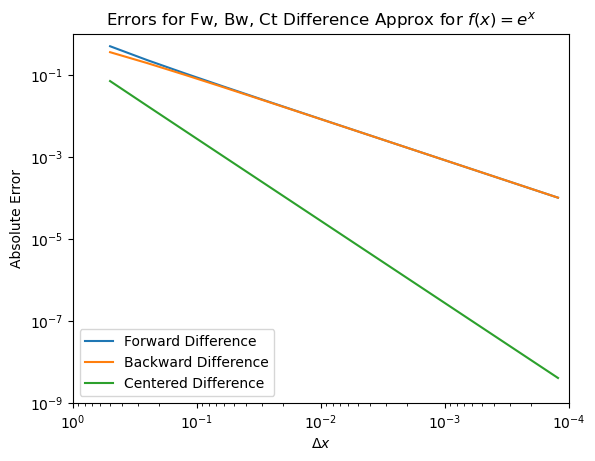

In [31]:
# The following code finds the forward, backward, and centered difference
# derivative approximations for a given function for a range of delta 
# values, then plots the absolute errors on a log-log scale plot.


# Necessary imports
import numpy as np
import matplotlib.pyplot as plt

# "Magic" statement for jupyter notebook to display plots
%matplotlib inline
## Initialization
# Point where derivative is evaluated
x = 0.5
#function to be differentiated
f = np.exp(x)
#Derivative of function (theo. calculation)
fPrime = np.exp(x)
#get vector of deltax values
deltax = 2.**np.arange(-1,-14,-1)

## Calculation
#Compute forward approx.
fPlus = np.exp(x + deltax)
forward = (fPlus - f)/deltax

#Compute backward approx
fMinus = np.exp(x - deltax)
backward = (f - fMinus)/deltax

#use average of forward and backward for centered
centered = (forward+backward)/2

#compute absolute errors
forwardError = abs(fPrime - forward)
backwardError = abs(fPrime - backward)
centerError = abs(fPrime - centered)


## Display section -- create figure
plt.figure(1)
#plot forward, backward, and centered errors on log-log scale

plt.plot(deltax, forwardError, label="Forward Difference")
plt.plot(deltax, backwardError, label="Backward Difference")
plt.plot(deltax, centerError, label="Centered Difference")

# If limits are specified, set plot limits
plt.xlim([1,1e-4])
plt.ylim([1e-9,1])

# Use log-log scale
plt.xscale("log")
plt.yscale("log")
# Label plot and axes
plt.xlabel("$\Delta x$")
plt.ylabel("Absolute Error")

# Add legend and title
plt.legend(loc=3)
plt.title("Errors for Fw, Bw, Ct Difference Approx for $f(x) = e^x$")


plt.show()

1. Make a copy of the original code and put it in another cell.  Modify the code to find and graph backward, forward, and centered difference absolute true errors for the derivative of $f(x) = sin^2(x)$ for $x = \frac{\pi}{4}$.  Use the following values of $\Delta x$: 3E-1, 3E-2, 3E-3, … 3E-9.  The  $\Delta x$ values on the x-axis should use reverse log scale (as with the original code). The expression E-n means $\times 10^{-n}$. You may enter it exaclty as it appears here, and Python will be able to interpret it correctly. 
Notice that the relation between the accuracy for the three methods is different than in the original code. What is the difference? Compute (exactly) the second derivatives $f’’(x)$ for the original code and your code for part 1 . How do you suppose the values of the second derivative are related to the relative accuracy of the three methods?  Put your comments in the code. 

2. We have remarked that the centered difference approximation  is the equal average of the forward (FW) and the backward (BW) difference approximations: (0.5FW + 0.5BW). It is possible to take other (unequal) averages, such as ( 0.4FW + 0.6BW), (0.3FW + 0.7BW), and so on. A general expression for such an average is:  ($\alpha$FW + $\beta$BW),  where $\alpha + \beta = 1$.  Make a copy of the original code and put it in a new cell. In the new cell, add three new variables and put the results for the following three combinations:  (i)  $\alpha = 0.4 \beta = 0.6$; (ii) $\alpha = 0.49 \beta = 0.51$; (iii) $\alpha=0.499, \beta = 0.501$.  Add the errors for these three cases to the existing graph. Describe and interpret the trends that you see in the graph. Pay particular attention to the slopes. If the graphs for two different approximation methods have nearly the same slope, then what does that tell you about the accuracy of the corresponding methods? Put your comments after the code.

3. In Chapter 2.02 page 10, we find the forward difference approximation for the second derivative  of $f(x)$ at the point x_i:  
$$\begin{aligned}
f''(x_i) \approx \frac{f(x_{i+2})-2f(x_{i+1})+f(x_i)}{(\Delta x)^2}+O(\Delta x)
\end{aligned}$$  
On page 12, we find the centered difference approximation:  
$$\begin{aligned}
f''(x_i) \approx \frac{f(x_{i+1})-2f(x_{i})+f(x_{i-1})}{(\Delta x)^2}+O(\Delta x)^2
\end{aligned}$$  
From these two formulas, you may infer the backward difference approximation formula.  
     Make a copy of the original code and put it in a new cell. Modify the code to compute the forward, backward, and centered difference approximations for the second derivative of $f(x) = x^3$ at the point $x=1$. Use the same values of $\Delta x$ as in the original code. Plot the errors for the different approximations. What value of $\Delta x$ is required to obtain a true accuracy of 3 decimal digits for the three methods? Put your answer as a comment below the code. 
4. In a new cell, modify your code so that you can plot the errors for the forward, backwards, and centered difference approximation of the first derivative obtained in the original alongside the error for forward, backward, and centered difference found in part 3. Compare the slopes of these lines. What does this tell you about the accuracy of the second derivative approximations as compared to the accuracy of the first derivative approximations?  Put your comments after the code.


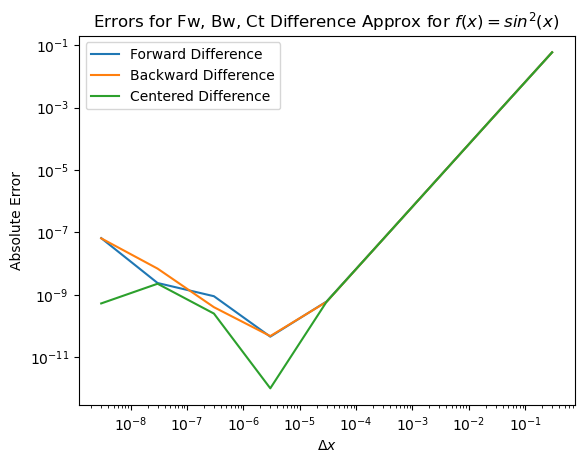

In [249]:
# find and graph backward, forward, and centered difference absolute true errors for the derivative of 𝑓(𝑥)=𝑠𝑖𝑛^2(𝑥) for 𝑥=𝜋/4. 
# use the following values of Δ𝑥: 3E-1, 3E-2, 3E-3, … 3E-9. The Δ𝑥 values on the x-axis should use reverse log scale. E-n means ×10^−𝑛.
# notice that the relation between the accuracy for the three methods is different than in the original code. 
# what is the difference? compute (exactly) the second derivatives 𝑓″(𝑥) for the original code and your code for part 1 . 
# how do you suppose the values of the second derivative are related to the relative accuracy of the three methods? 

# the relation between the accuracy of the three methods in the code below is different from the original code
# in the code below, all three errors end up decreasing and then going towards the same value as the deltax values increase
# whereas in the original code the centered error was converging to a different value from the forward and backward
# e^0.5 = 1.65, 2(cos(pi/4)^2 + sin(pi/4)^2) = 2, i believe the centered approximation will be most accurate for both
# the more the second deriv is greater than zero, the more small the range of deltax values will have to be, reducing accuracy
# in both the forward and backward approximations. centered approximations seem more accurate since the slope for the OG
# code is lower than the backward and forward approximations, in the code below though all three errors seem to be approaching
# the true value of the first derivative

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Initialization
# Point where derivative is evaluated
x = np.pi/4
#function to be differentiated
f = np.sin(x)**2
#Derivative of function (theo. calculation)
fPrime = 2*np.sin(x)*np.cos(x)
#get vector of deltax values
deltax = 3*10.**np.arange(-1,-10,-1)

## Calculation
#Compute forward approx.
fPlus = (np.sin(x+deltax)) ** 2
forward = (fPlus - f)/deltax

#Compute backward approx
fMinus = (np.sin(x-deltax)) ** 2
backward = (f - fMinus)/deltax

#use average of forward and backward for centered
centered = (forward+backward)/2

#compute absolute errors
forwardError = abs(fPrime - forward)
backwardError = abs(fPrime - backward)
centerError = abs(fPrime - centered)

## Display section -- create figure
plt.figure(1)
#plot forward, backward, and centered errors on log-log scale

plt.plot(deltax, forwardError, label="Forward Difference")
plt.plot(deltax, backwardError, label="Backward Difference")
plt.plot(deltax, centerError, label="Centered Difference")

# If limits are specified, set plot limits
#plt.xlim([3e-10,0.5])
#plt.ylim([3e-13,3e-1])

# Use log-log scale
plt.xscale("log")
plt.yscale("log")
# Label plot and axes
plt.xlabel("$\Delta x$")
plt.ylabel("Absolute Error")

# Add legend and title
plt.legend(loc=2)
plt.title("Errors for Fw, Bw, Ct Difference Approx for $f(x) = sin^2(x)$")


plt.show()

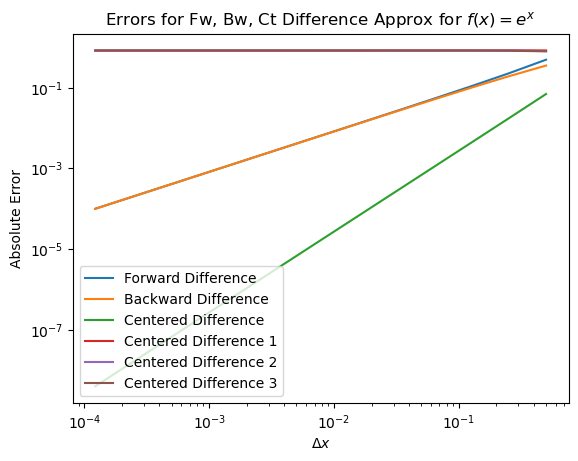

In [252]:
# (0.5FW + 0.5BW). It is possible to take other (unequal) averages, like ( 0.4FW + 0.6BW), (0.3FW + 0.7BW), and so on. 
# a general expression for such an average is: (𝛼FW + 𝛽BW), where 𝛼+𝛽=1.
# add three new variables + results for the following three combinations: 𝛼=0.4𝛽=0.6; 𝛼=0.49𝛽=0.51; 𝛼=0.499,𝛽=0.501. 
# add the errors for these three cases to the existing graph. Describe and interpret the trends that you see in the graph. 
# pay particular attention to the slopes. If the graphs for two different approximation methods have nearly the same slope, 
# then what does that tell you about the accuracy of the corresponding methods? (answer is below code)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Initialization
# Point where derivative is evaluated
x = 0.5
#function to be differentiated
f = np.exp(x)
#Derivative of function (theo. calculation)
fPrime = np.exp(x)
#get vector of deltax values
deltax = 2.**np.arange(-1,-14,-1)

## Calculation
#Compute forward approx.
fPlus = np.exp(x + deltax)
forward = (fPlus - f)/deltax

#Compute backward approx
fMinus = np.exp(x - deltax)
backward = (f - fMinus)/deltax

#use average of forward and backward for centered
centered = (forward+backward)/2

#compute absolute errors
forwardError = abs(fPrime - forward)
backwardError = abs(fPrime - backward)
centerError = abs(fPrime - centered)
centerError1 = abs(fPrime - ((0.4*forward) + (0.6*backward))/2)
centerError2 = abs(fPrime - ((0.49*forward) + (0.5*backward))/2)
centerError3 = abs(fPrime - ((0.499*forward) + (0.50*backward))/2)

## Display section -- create figure
plt.figure(1)

#plot forward, backward, and centered errors on log-log scale

plt.plot(deltax, forwardError, label="Forward Difference")
plt.plot(deltax, backwardError, label="Backward Difference")
plt.plot(deltax, centerError, label="Centered Difference")

plt.plot(deltax, centerError1, label="Centered Difference 1")
plt.plot(deltax, centerError2, label="Centered Difference 2")
plt.plot(deltax, centerError3, label="Centered Difference 3")

# If limits are specified, set plot limits
#plt.xlim([1,1e-4])
#plt.ylim([1e-10,2])

# Use log-log scale
plt.xscale("log")
plt.yscale("log")
# Label plot and axes
plt.xlabel("$\Delta x$")
plt.ylabel("Absolute Error")

# Add legend and title
plt.legend(loc=3)
plt.title("Errors for Fw, Bw, Ct Difference Approx for $f(x) = e^x$")
plt.show()

#all three errors have similar slopes, increasing(very slowly). they are however very close to y = 1
# this aligns with the equation provided: 𝛼FW + 𝛽BW, where 𝛼+𝛽=1
#if the graphs for two different approximation methods have nearly the same slope, it tells me that they have similar accuracy
# and that they both could be converging to similar values, especially if the slopes are very close to each other.
# else if the slopes are not close to each other on the graph but are almost parallel, then it could mean one approx
# has provided a higher approx than the other. It can give insight into relative approx.

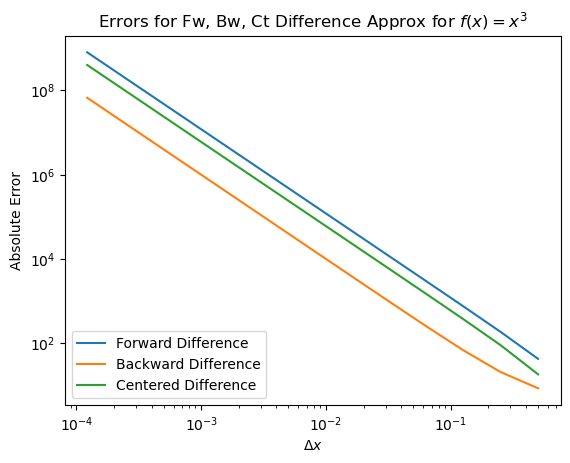

In [216]:
# forward, backward, and centered difference approximations for the second derivative of 𝑓(𝑥)=𝑥^3 at the point 𝑥=1
# use the same values of Δ𝑥 as in the original code. Plot the errors for the different approximations. 
# what value of Δ𝑥 is required to obtain a true accuracy of 3 decimal digits for the three methods? 0.5, since we want accuracy to 0.001

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Initialization
# Point where derivative is evaluated
x = 1
#function to be differentiated
f = x ** 3
#Second derivative of function (theo. calculation)
fPrime = 6 * x
#get vector of deltax values
deltax = 2.**np.arange(-1,-14,-1)

## Calculation
#Compute forward approx.
forward = (((x + 2) ** 3) - (2 * (x + 1) ** 3) + (x ** 3))/(deltax **2) + deltax

#Compute backward approx
backward = (x ** 3) - (2 * (x - 1) ** 3) + ((x - 2) ** 3)/(deltax **2) + deltax

#use average of forward and backward for centered
centered = ((((x + 1)** 3) - (2 * (x ** 3)) + ((x - 1) ** 3))/(deltax **2)) + (deltax ** 2)

#compute absolute errors
forwardError = abs(fPrime - forward)
backwardError = abs(fPrime - backward)
centerError = abs(fPrime - centered)


## Display section -- create figure
plt.figure(1)
#plot forward, backward, and centered errors on log-log scale

plt.plot(deltax, forwardError, label="Forward Difference")
plt.plot(deltax, backwardError, label="Backward Difference")
plt.plot(deltax, centerError, label="Centered Difference")

# If limits are specified, set plot limits
#plt.xlim([1e0,1e-4])
#plt.ylim([1e-1,1e13])

# Use log-log scale
plt.xscale("log")
plt.yscale("log")
# Label plot and axes
plt.xlabel("$\Delta x$")
plt.ylabel("Absolute Error")

# Add legend and title
plt.legend(loc=3)
plt.title("Errors for Fw, Bw, Ct Difference Approx for $f(x) = x^3$")


plt.show()

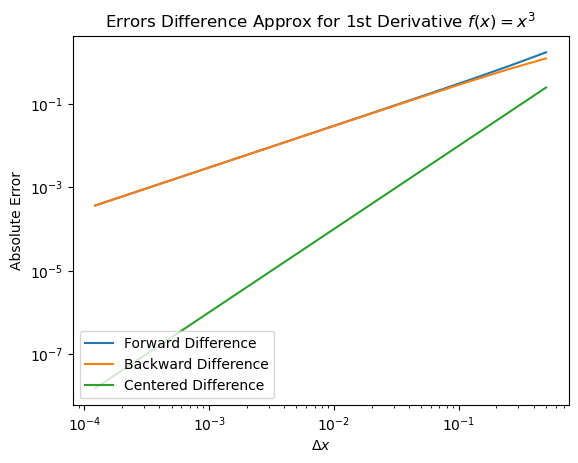

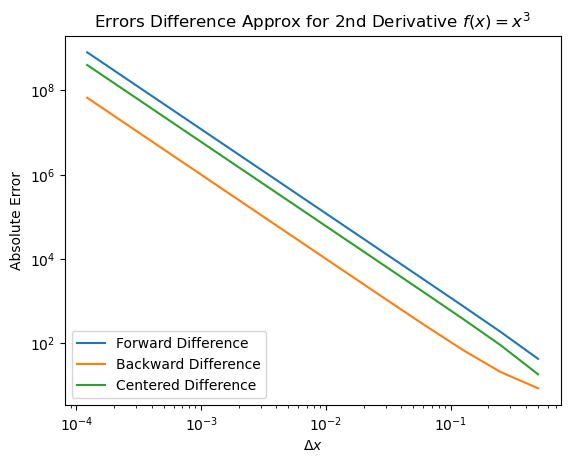

In [253]:
# errors for the forward, backwards, and centered difference approximation of the first derivative obtained in the original 
# alongside the error for forward, backward, and centered difference found in part 3. compare the slopes of these lines. 
# what does this tell you about the accuracy of the second derivative approximations as compared to the accuracy of the first 
# derivative approximations?

# the accuracy of the second derivative approx are relatively better/more consistent than the first deriv approx. this is because all
# three errors have almost the same slopes, and are all decreasing. the first deriv slopes are not as similar. only
#the forward and backward errors have same slope, not the center approx
# the reason why 2nd deriv is descreasing slope and 1st deriv is increasing slope might be because 2nd converges faster 
# and more precisely, 1st is slower since the deltax values dont affect it as much as 2nd hence the difference in slopes.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#first derivative
x = 1
f = x ** 3
fPrime = 3 * (x ** 2)
deltax = 2.**np.arange(-1,-14,-1)

fPlus = (x + deltax) ** 3
forward = (fPlus - f)/deltax
fMinus = (x - deltax) ** 3
backward = (f - fMinus)/deltax
centered = (forward+backward)/2

forwardError = abs(fPrime - forward)
backwardError = abs(fPrime - backward)
centerError = abs(fPrime - centered)

plt.figure(1)
plt.plot(deltax, forwardError, label="Forward Difference")
plt.plot(deltax, backwardError, label="Backward Difference")
plt.plot(deltax, centerError, label="Centered Difference")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("$\Delta x$")
plt.ylabel("Absolute Error")

plt.legend(loc=3)
plt.title("Errors Difference Approx for 1st Derivative $f(x) = x^3$")
plt.show()

#second derivative
fPrime2 = 6 * x

forward2 = (((x + 2) ** 3) - (2 * (x + 1) ** 3) + (x ** 3))/(deltax **2) + deltax
backward2 = (x ** 3) - (2 * (x - 1) ** 3) + ((x - 2) ** 3)/(deltax **2) + deltax
centered2 = (((x + 1)** 3) - (2 * (x ** 3)) + ((x - 1) ** 3))/(deltax **2) + (deltax ** 2)

forwardError2 = abs(fPrime2 - forward2)
backwardError2 = abs(fPrime2 - backward2)
centerError2 = abs(fPrime2 - centered2)

plt.figure(1)
plt.plot(deltax, forwardError2, label="Forward Difference")
plt.plot(deltax, backwardError2, label="Backward Difference")
plt.plot(deltax, centerError2, label="Centered Difference")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("$\Delta x$")
plt.ylabel("Absolute Error")

plt.legend(loc=3)
plt.title("Errors Difference Approx for 2nd Derivative $f(x) = x^3$")
plt.show()